In [1]:
!pip install scikit-fuzzy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

     |████████████████████████████████| 993 kB 12.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=3d087b3f6950f37f42814a69769071146a1fd0540084be5a15b3fb00f564f25c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
x_erro=np.arange(-1.5,1.55,0.05)
x_Dnivel=np.arange(-0.3,0.35,0.005)
x_val=np.arange(-1.0,1.01,0.01)

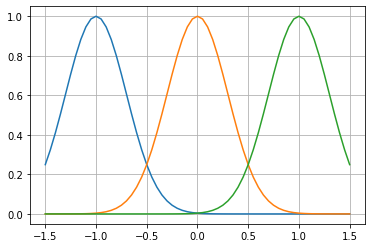

In [3]:
erro_alto=fuzz.gaussmf(x_erro, -1, 0.3)
erro_ideal=fuzz.gaussmf(x_erro, 0, 0.3)
erro_baixo=fuzz.gaussmf(x_erro, 1, 0.3)
plt.plot(x_erro, erro_alto)
plt.plot(x_erro, erro_ideal)
plt.plot(x_erro, erro_baixo)
plt.grid()

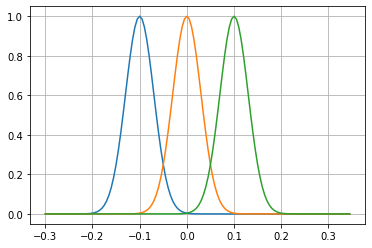

In [4]:
Dnivel_negativo=fuzz.gaussmf(x_Dnivel, -0.1, 0.03)
Dnivel_zero=fuzz.gaussmf(x_Dnivel, 0, 0.03)
Dnivel_positiva=fuzz.gaussmf(x_Dnivel, 0.1, 0.03)
plt.plot(x_Dnivel, Dnivel_negativo)
plt.plot(x_Dnivel, Dnivel_zero)
plt.plot(x_Dnivel, Dnivel_positiva)
plt.grid()

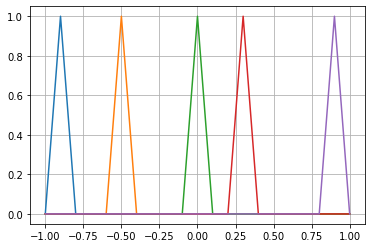

In [5]:
valv_f_rap=fuzz.trimf(x_val, [-1.0, -0.9,-0.8])
valv_f_dev=fuzz.trimf(x_val, [-0.6, -0.5,-0.4])
valv_perma=fuzz.trimf(x_val, [-0.1, 0.0, 0.1])
valv_a_dev=fuzz.trimf(x_val, [0.2, 0.3, 0.4])
valv_a_rap=fuzz.trimf(x_val, [0.8,0.9, 1.0])
plt.plot(x_val, valv_f_rap)
plt.plot(x_val, valv_f_dev)
plt.plot(x_val, valv_perma)
plt.plot(x_val, valv_a_dev)
plt.plot(x_val, valv_a_rap)
plt.grid()

In [6]:
Dnivel_negativo_act = fuzz.interp_membership(x_Dnivel, Dnivel_negativo,-0.05)
Dnivel_zero_act = fuzz.interp_membership(x_Dnivel, Dnivel_zero,-0.05)
Dnivel_positiva_act= fuzz.interp_membership(x_Dnivel, Dnivel_positiva,-0.05)

print(Dnivel_negativo_act)
print(Dnivel_zero_act)
print(Dnivel_positiva_act)

0.24935220877729644
0.2493522087772964
3.7266531720787095e-06


In [7]:
erro_alto_act = fuzz.interp_membership(x_erro, erro_alto,0.4)
erro_ideal_act = fuzz.interp_membership(x_erro, erro_ideal,0.4)
erro_baixo_act= fuzz.interp_membership(x_erro, erro_baixo,0.4)

print(erro_alto_act)
print(erro_ideal_act)
print(erro_baixo_act)

1.866446911352082e-05
0.41111229050718745
0.13533528323661287


In [8]:
regra1= np.fmin(erro_ideal_act,valv_perma)

regra2= np.fmin(erro_baixo_act,valv_a_rap)

regra3= np.fmin(erro_alto_act,valv_f_rap)

regra4_ant= np.fmin(erro_ideal_act,Dnivel_positiva_act)
regra4= np.fmin(regra4_ant,valv_f_dev)

regra5_ant= np.fmin(erro_ideal_act,Dnivel_negativo_act)
regra5= np.fmin(regra5_ant,valv_a_dev)

agregado = np.fmax(regra1, np.fmax(regra2, np.fmax(regra3, np.fmax(regra4, regra5))))

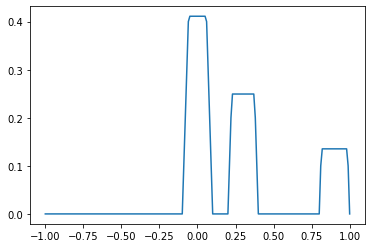

In [9]:
plt.plot(x_val,agregado)

In [11]:
val =fuzz.defuzz(x_val,agregado,'centroid')

In [12]:
print(val)

0.26582272924525746
